<a href="https://colab.research.google.com/github/AswadulRashik/Alzheimer-Prediction/blob/main/Alzheimer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Import Dataset**

In [39]:
alzheimer = pd.read_csv('/content/alzheimers_disease_data.csv')

**Dataset Information**

In [40]:
alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

# **Exploratory Data Analysis**


*Train and test dataset*

In [41]:
train_alzheimer, test_alzheimer = train_test_split(alzheimer, test_size = 0.2, random_state = 42)

print(train_alzheimer.shape)
print(test_alzheimer.shape)

(1719, 35)
(430, 35)


*Mapping on columns*

In [42]:

binary_columns = ["Smoking", "FamilyHistoryAlzheimers", "CardiovascularDisease", "Diabetes",
                  "Depression", "HeadInjury", "Hypertension", "MemoryComplaints", "BehavioralProblems",
                  "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
                  "Forgetfulness", "Diagnosis"]

mapping_binary_columns = {0: "No", 1: "Yes"}
train_alzheimer[binary_columns] = train_alzheimer[binary_columns].replace(mapping_binary_columns)

#Gender mapping
mapping_gender = {0: "Male", 1: "Female"}
train_alzheimer["Gender"] = train_alzheimer["Gender"].map(mapping_gender)

#Ethnicity mapping
mapping_ethnicity = {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}
train_alzheimer["Ethnicity"] = train_alzheimer["Ethnicity"].map(mapping_ethnicity)

#EducationLevel mapping
mapping_educationlevel = {0: "None", 1: "High School", 2: "Bachelor's", 3: "Higher"}
train_alzheimer["EducationLevel"] = train_alzheimer["EducationLevel"].map(mapping_educationlevel)


**Demographic Analysis**


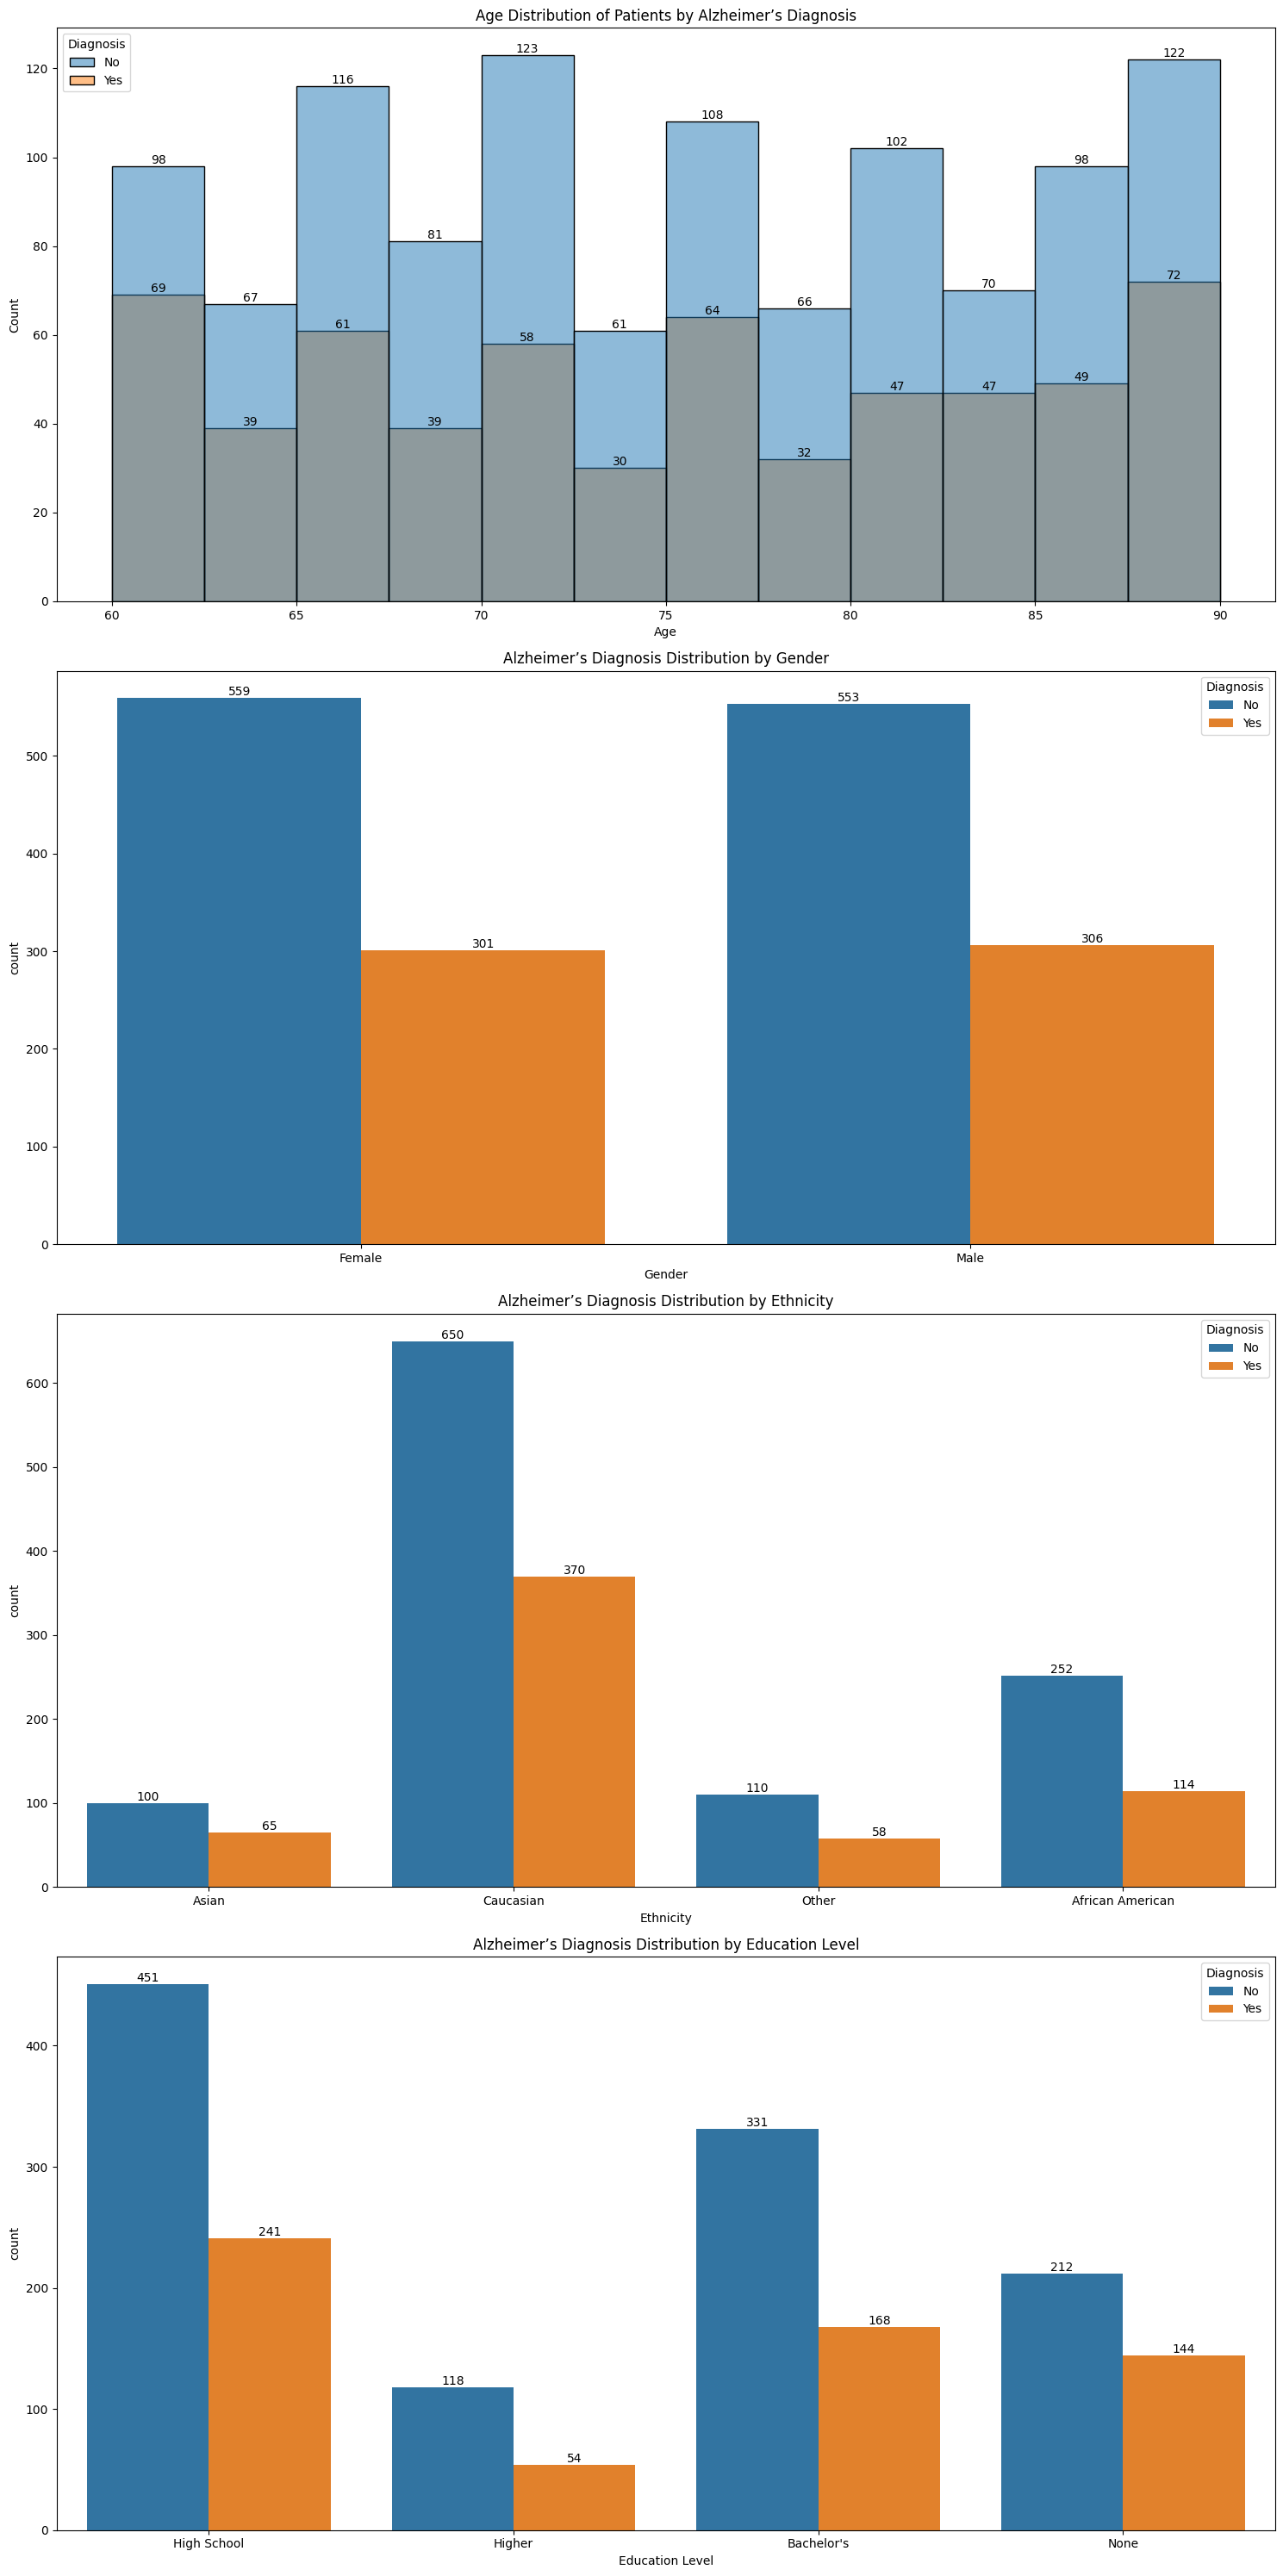

In [43]:
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container)

fig, axes = plt.subplots(4, 1, figsize=(15, 30))

plots_info = [
    (sns.histplot, "Age", "Age", "Age Distribution of Patients by Alzheimer’s Diagnosis"),
    (sns.countplot, "Gender", "Gender", "Alzheimer’s Diagnosis Distribution by Gender"),
    (sns.countplot, "Ethnicity", "Ethnicity", "Alzheimer’s Diagnosis Distribution by Ethnicity"),
    (sns.countplot, "EducationLevel", "Education Level", "Alzheimer’s Diagnosis Distribution by Education Level")
]


for ax, (plot_func, column, xlabel, title) in zip(axes, plots_info):
    if plot_func == sns.kdeplot:
        plot_func(data = train_alzheimer, x = column, hue = "Diagnosis", fill = True, ax = ax)
    else:
        plot_func(data = train_alzheimer, x = column, hue = "Diagnosis", ax = ax)
        add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

plt.tight_layout()
plt.show()


**Behavioural Factors**


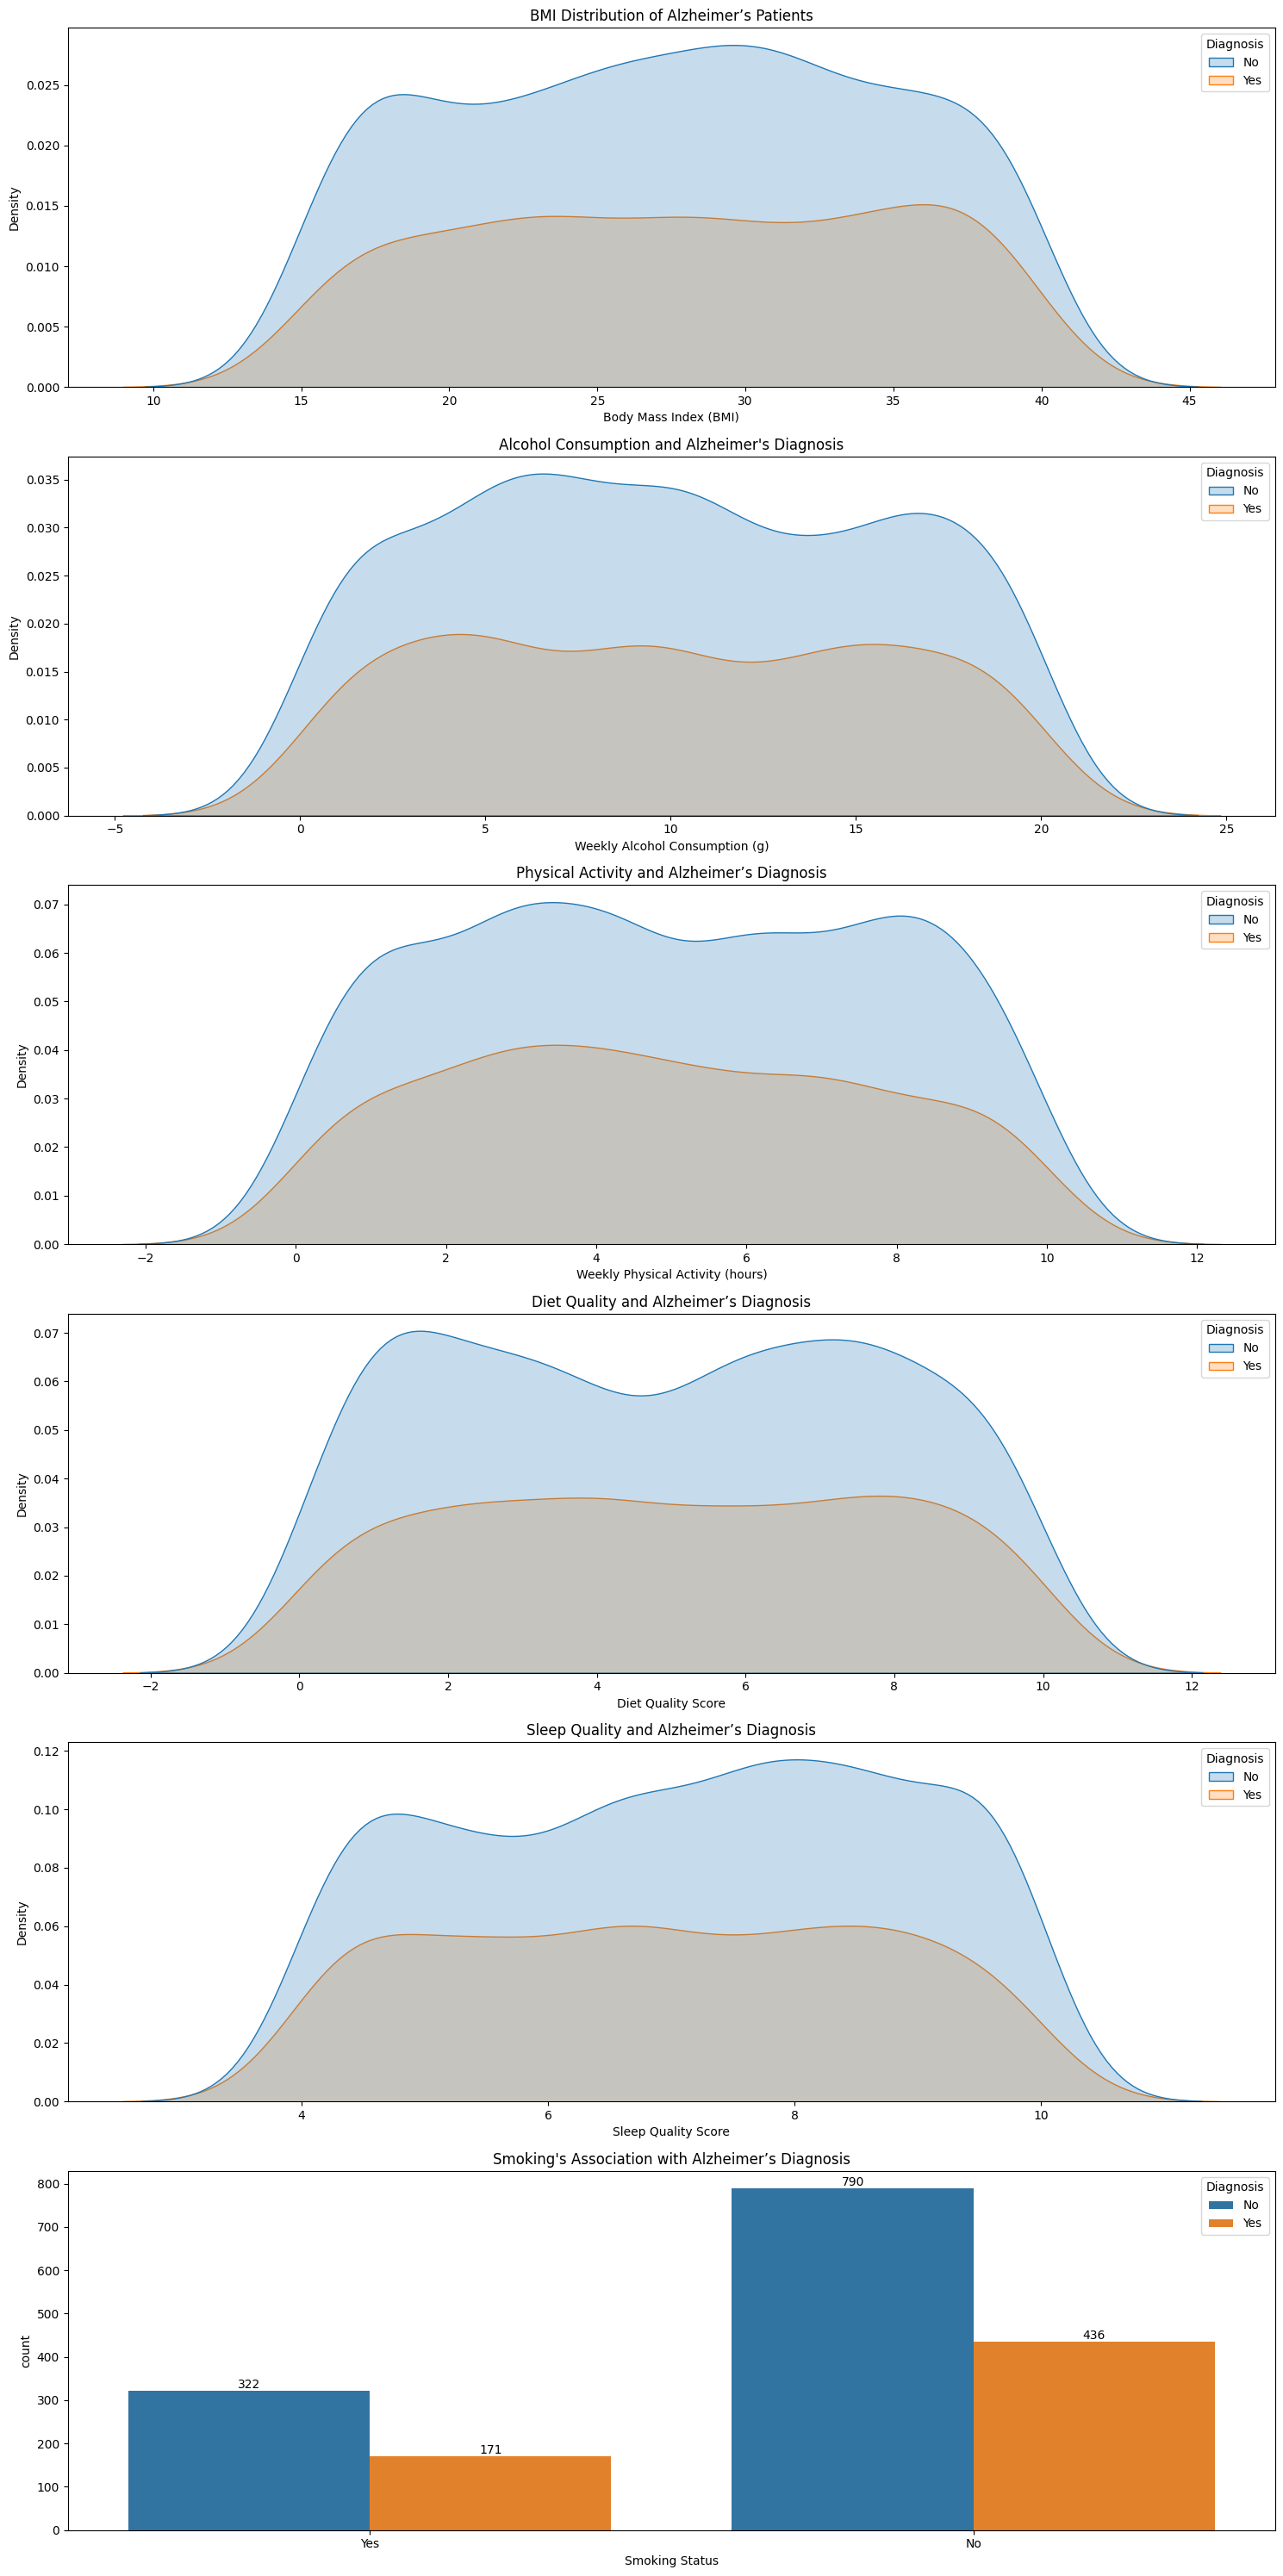

In [44]:
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container)


fig, axes = plt.subplots(6, 1, figsize=(15, 30))


plots_info = [
    (sns.kdeplot, "BMI", "Body Mass Index (BMI)", "BMI Distribution of Alzheimer’s Patients"),
    (sns.kdeplot, "AlcoholConsumption", "Weekly Alcohol Consumption (g)", "Alcohol Consumption and Alzheimer's Diagnosis"),
    (sns.kdeplot, "PhysicalActivity", "Weekly Physical Activity (hours)", "Physical Activity and Alzheimer’s Diagnosis"),
    (sns.kdeplot, "DietQuality", "Diet Quality Score", "Diet Quality and Alzheimer’s Diagnosis"),
    (sns.kdeplot, "SleepQuality", "Sleep Quality Score", "Sleep Quality and Alzheimer’s Diagnosis"),
    (sns.countplot, "Smoking", "Smoking Status", "Smoking's Association with Alzheimer’s Diagnosis")
]


for ax, (plot_func, column, xlabel, title) in zip(axes, plots_info):
    if plot_func == sns.kdeplot:
        plot_func(data = train_alzheimer, x = column, hue = "Diagnosis", fill = True, ax = ax)
    else:
        plot_func(data = train_alzheimer, x = column, hue = "Diagnosis", ax = ax)
        add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

plt.tight_layout()
plt.show()


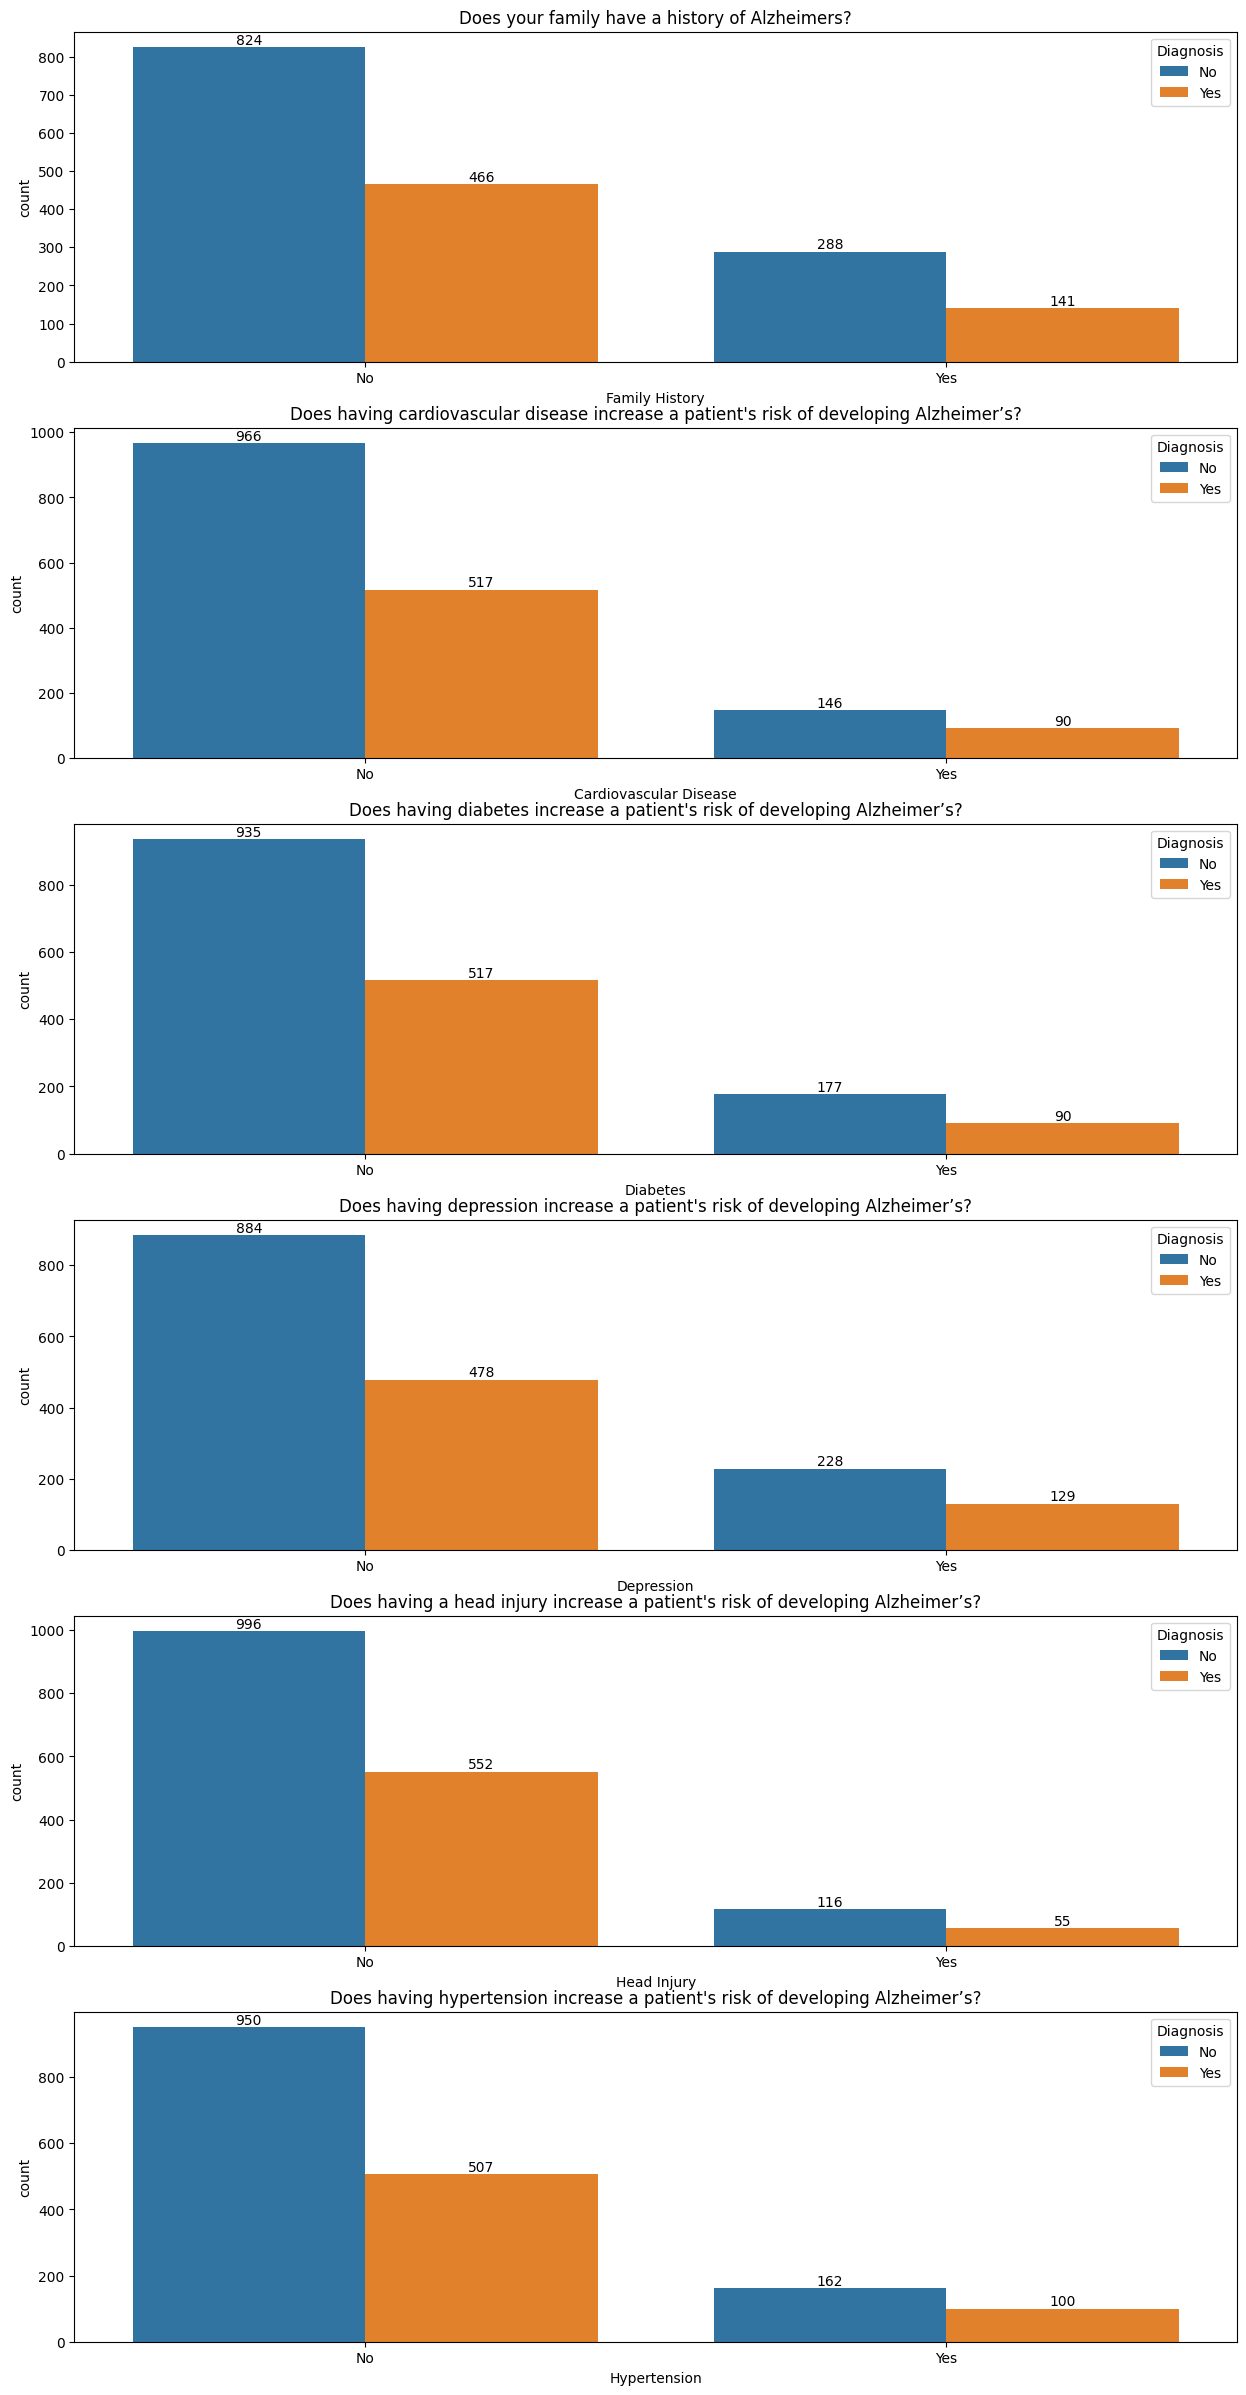

In [45]:

fig, axes = plt.subplots(6, 1, figsize = (15, 30))

plots_info = [
    ("FamilyHistoryAlzheimers", "Family History", "Does your family have a history of Alzheimers?"),
    ("CardiovascularDisease", "Cardiovascular Disease", "Does having cardiovascular disease increase a patient's risk of developing Alzheimer’s?"),
    ("Diabetes", "Diabetes", "Does having diabetes increase a patient's risk of developing Alzheimer’s?"),
    ("Depression", "Depression", "Does having depression increase a patient's risk of developing Alzheimer’s?"),
    ("HeadInjury", "Head Injury", "Does having a head injury increase a patient's risk of developing Alzheimer’s?"),
    ("Hypertension", "Hypertension", "Does having hypertension increase a patient's risk of developing Alzheimer’s?")
]


for ax, (column, xlabel, title) in zip(axes, plots_info):
    sns.countplot(data = train_alzheimer, x = column, hue = "Diagnosis", ax = ax)
    add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

**Symptoms**

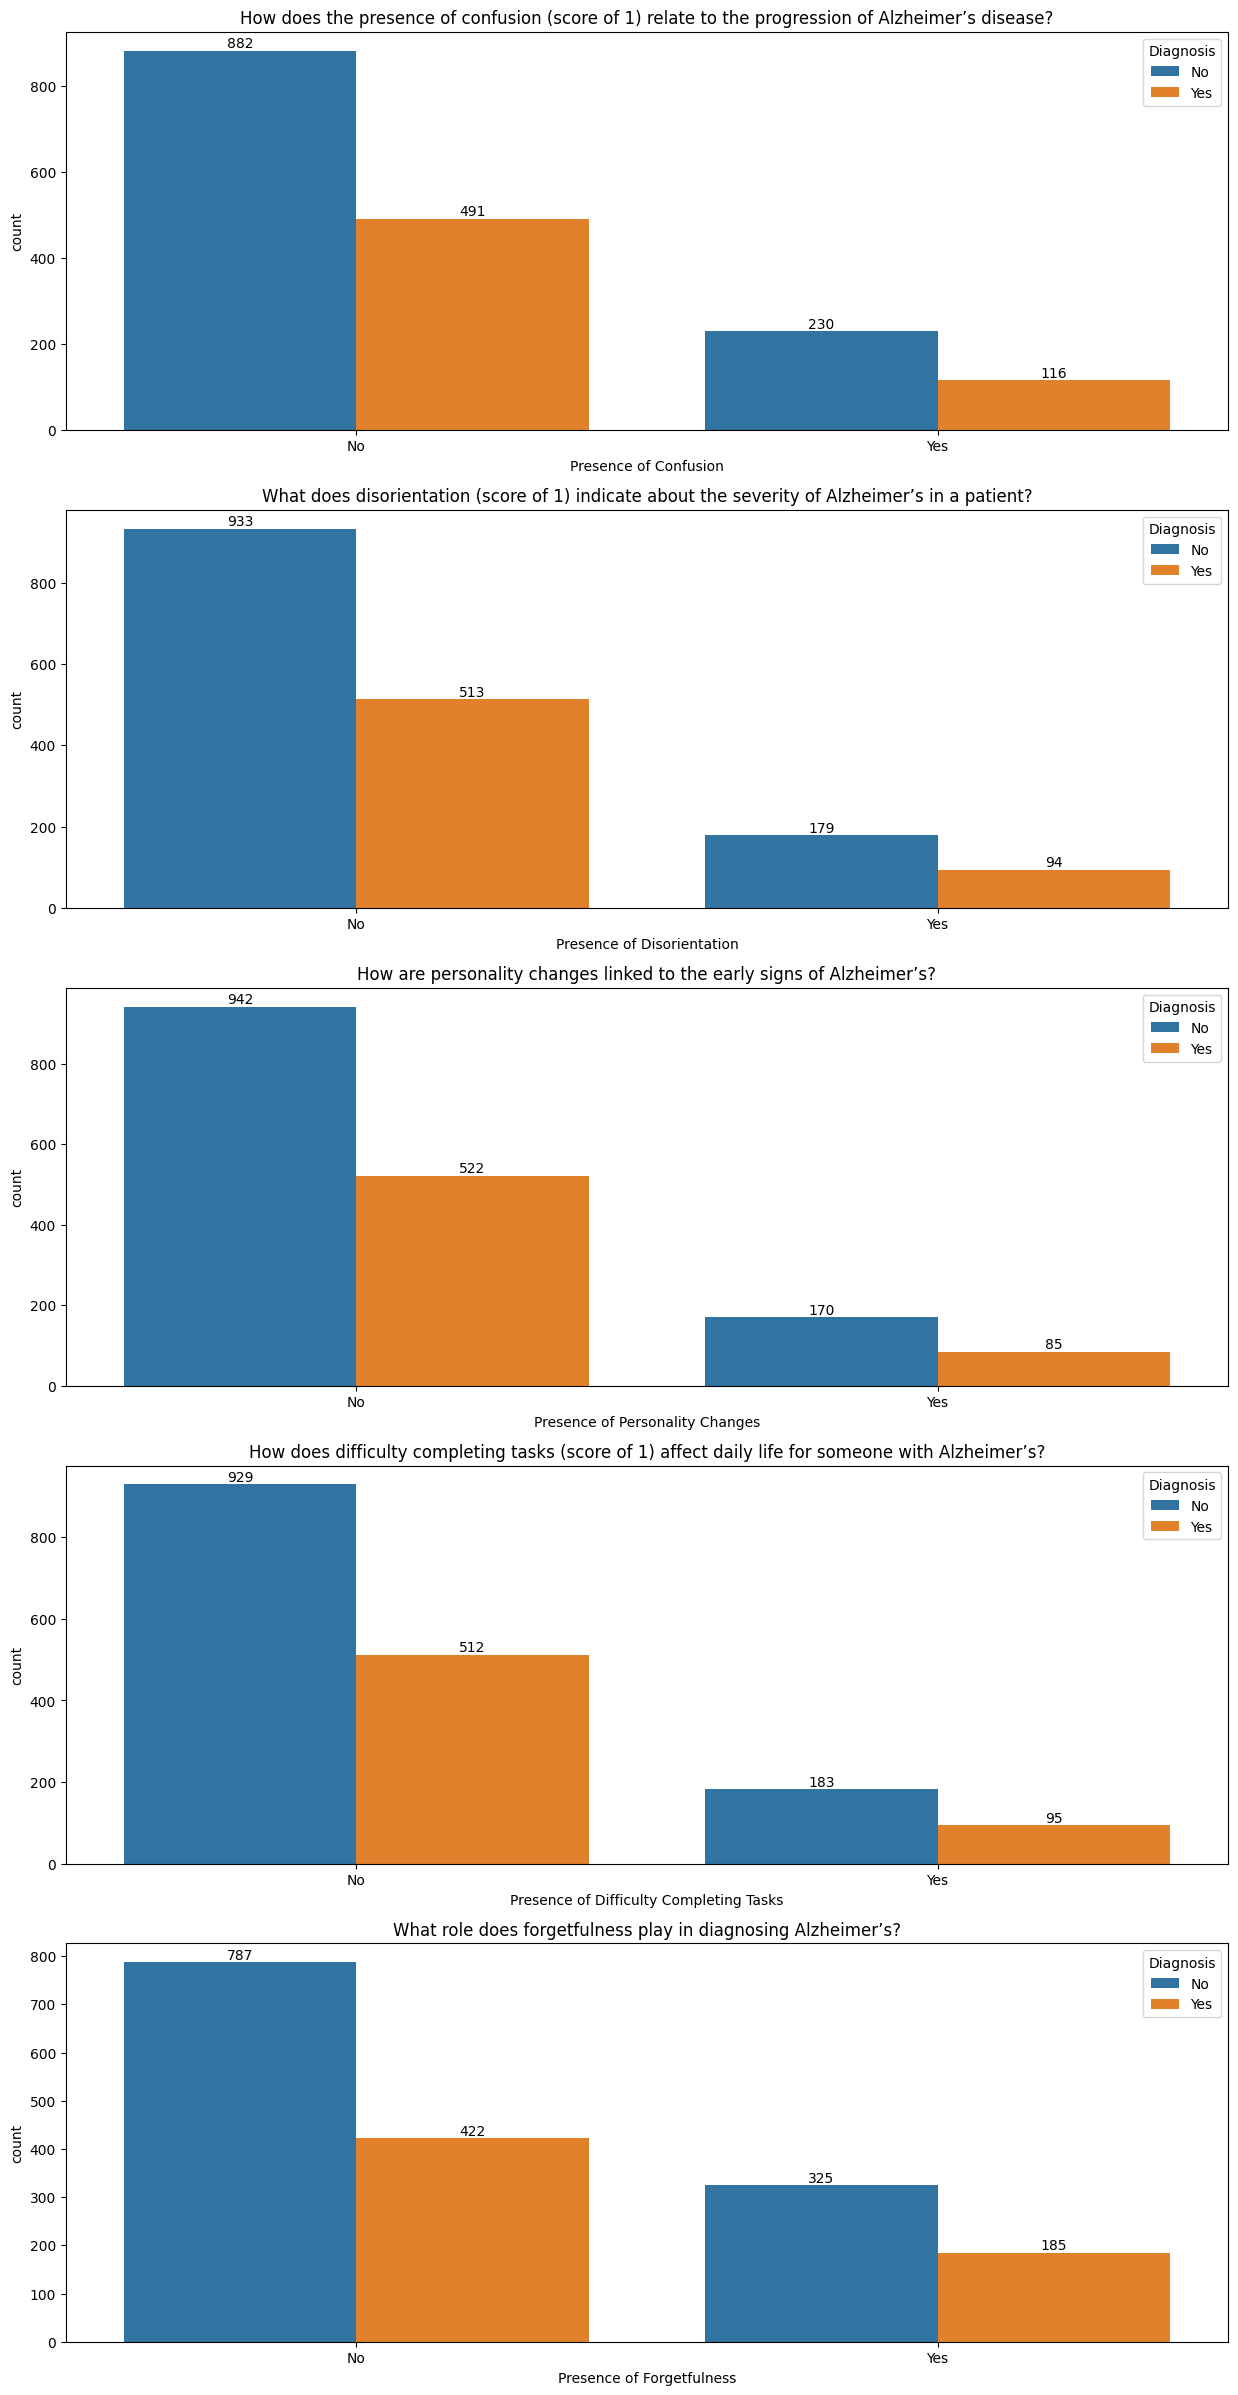

In [46]:

fig, axes = plt.subplots(5, 1, figsize = (15, 30))

plots_info = [
    ("Confusion", "Presence of Confusion", "How does the presence of confusion (score of 1) relate to the progression of Alzheimer’s disease?"),
    ("Disorientation", "Presence of Disorientation", "What does disorientation (score of 1) indicate about the severity of Alzheimer’s in a patient?"),
    ("PersonalityChanges", "Presence of Personality Changes", "How are personality changes linked to the early signs of Alzheimer’s?"),
    ("DifficultyCompletingTasks", "Presence of Difficulty Completing Tasks", "How does difficulty completing tasks (score of 1) affect daily life for someone with Alzheimer’s?"),
    ("Forgetfulness", "Presence of Forgetfulness", "What role does forgetfulness play in diagnosing Alzheimer’s?")
]

for ax, (column, xlabel, title) in zip(axes, plots_info):
    sns.countplot(data = train_alzheimer, x = column, hue = "Diagnosis", ax = ax)
    add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

In [47]:
# Columns to encode
categorical_cols = ["Gender", "Ethnicity", "EducationLevel",
                    "Smoking","FamilyHistoryAlzheimers","CardiovascularDisease","Diabetes",
                    "Depression","HeadInjury","Hypertension","MemoryComplaints","BehavioralProblems",
                    "Confusion","Disorientation","PersonalityChanges","DifficultyCompletingTasks",
                    "Forgetfulness","Diagnosis"]

from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder for binary and categorical features
le = LabelEncoder()
for col in categorical_cols:
    alzheimer[col] = le.fit_transform(alzheimer[col])

# Check encoding
alzheimer[categorical_cols].head()


,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,3,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [48]:
# Define the target variable
y = alzheimer['Diagnosis']  # Alzheimer's diagnosis

# Define feature variables
X = alzheimer.drop(columns=['PatientID', 'Diagnosis', 'DoctorInCharge'])  # Drop irrelevant columns

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (2149, 32)
Target shape: (2149,)


# **Corelation Heatmap**

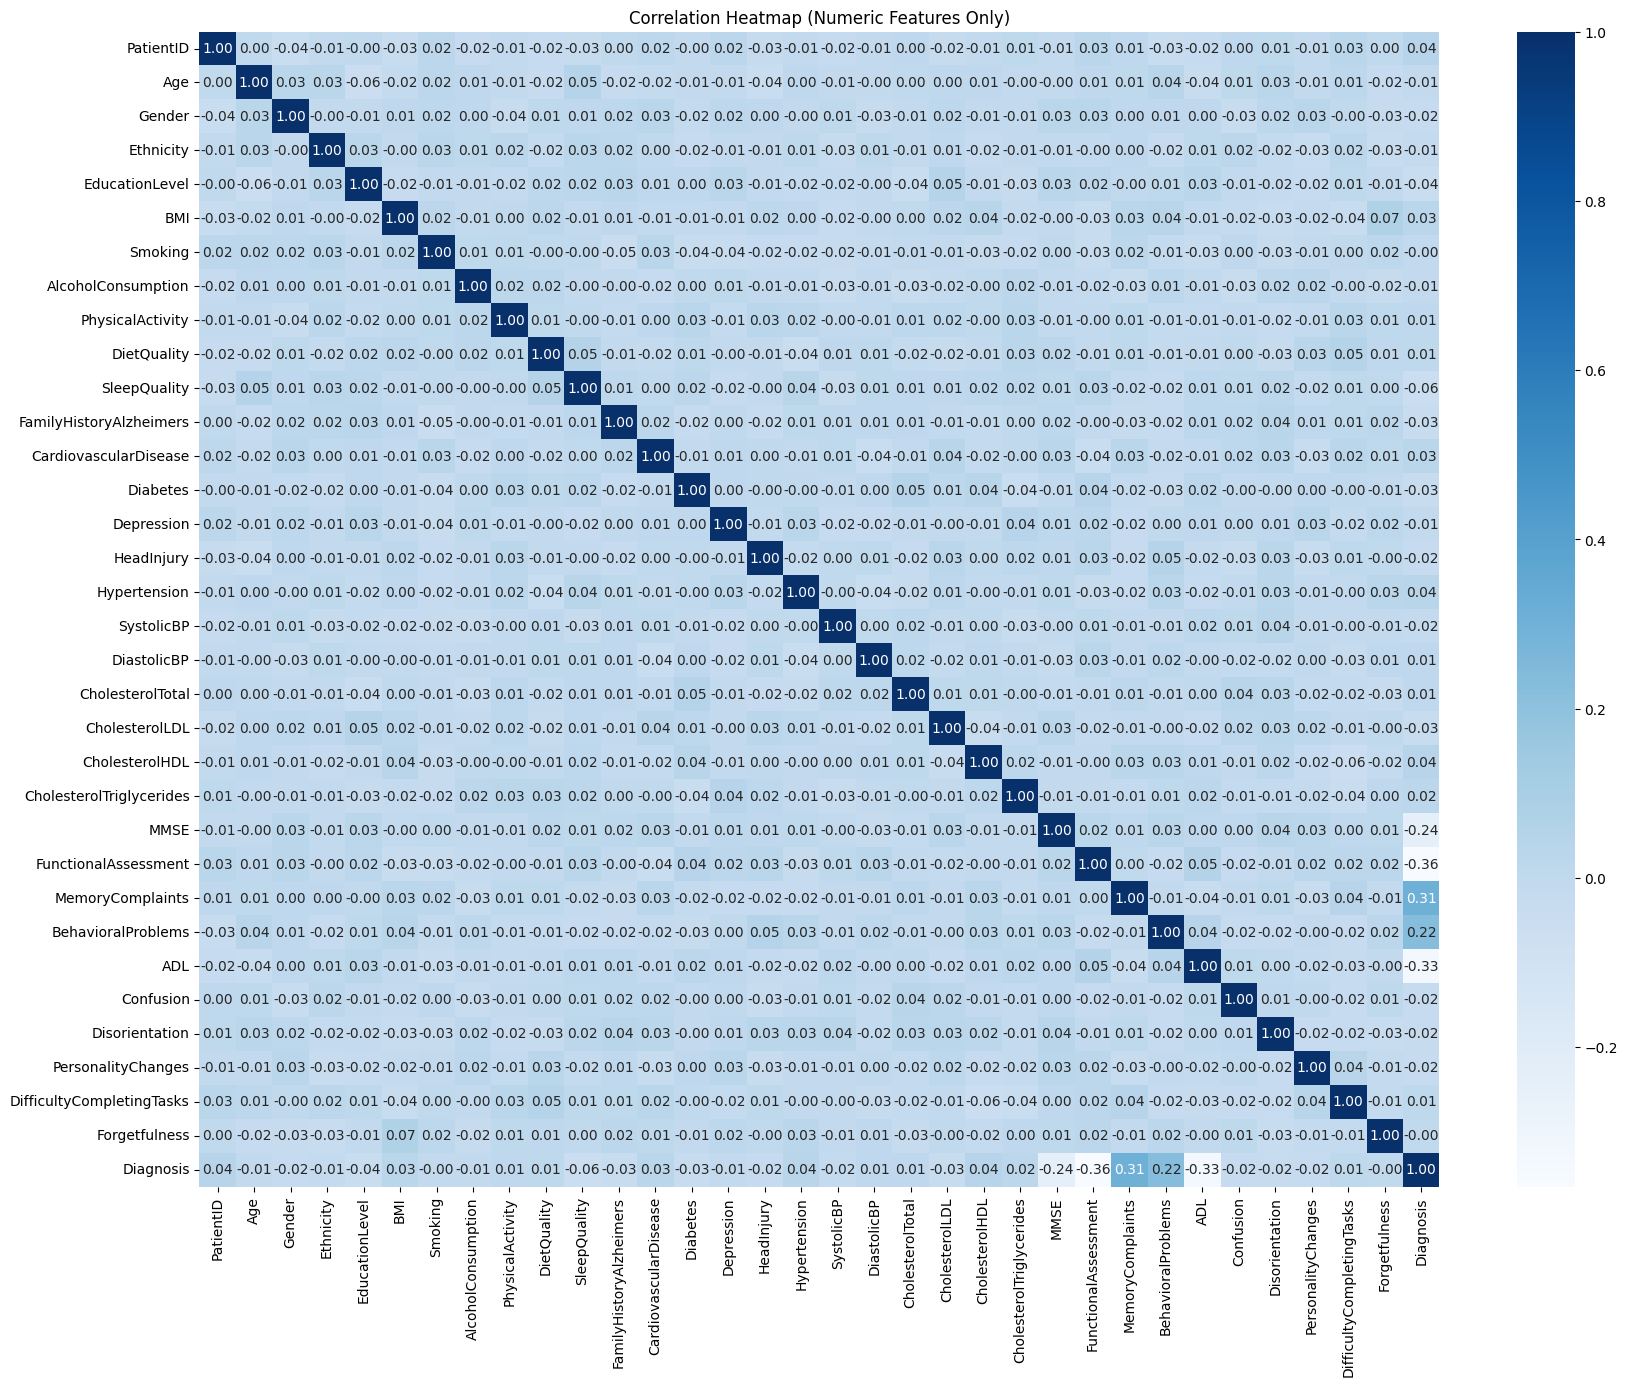

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = alzheimer.select_dtypes(include=[np.number])


corr = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


*Train and Test Splitting*

In [50]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shapes
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


X_train: (1719, 32) X_test: (430, 32)
y_train: (1719,) y_test: (430,)


# Random Forest

*Model Training*

In [52]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

#Import evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


*Confusion Matrix*

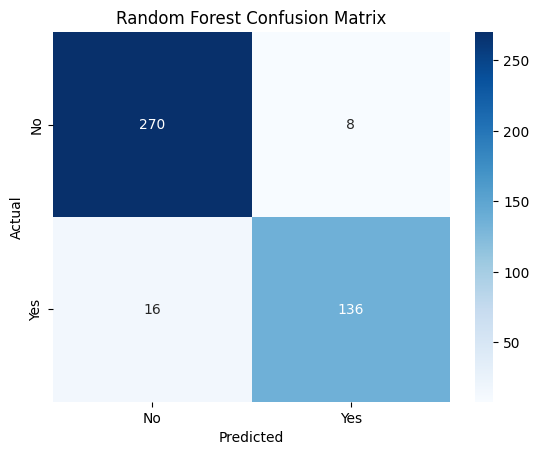

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

*Classification Report and accuracy*

In [54]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.94      0.89      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



In [55]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(accuracy_rf, 4))


Random Forest Accuracy: 0.9442


# CatBoost

In [26]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


*Model Training*

In [27]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cat_model = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    random_state=42,
    verbose=False
)

cat_model.fit(X_train, y_train)


y_pred_cat = cat_model.predict(X_test)


*Confusion Matrix*

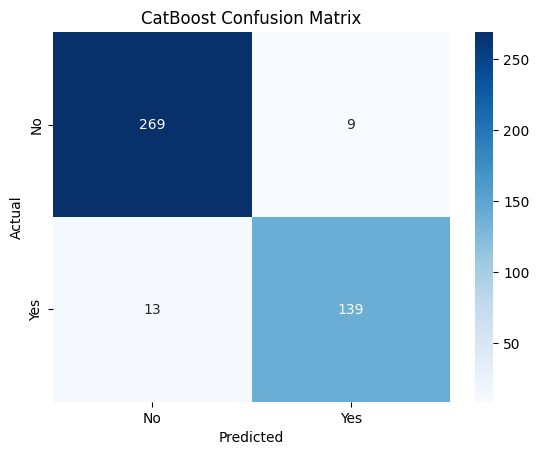

In [28]:
cm_cat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


*Classification Report and accuracy*

In [29]:
print("Classification Report:\n", classification_report(y_test, y_pred_cat))

accuracy_cat = accuracy_score(y_test, y_pred_cat)
print("CatBoost Accuracy:", round(accuracy_cat, 4))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.94      0.91      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

CatBoost Accuracy: 0.9488


# Support Vector Machine (SVM)

*Model Training*

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train)
X_test_svm = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_svm, y_train)

y_pred_svm = svm_model.predict(X_test_svm)


*Confusion Matrix*

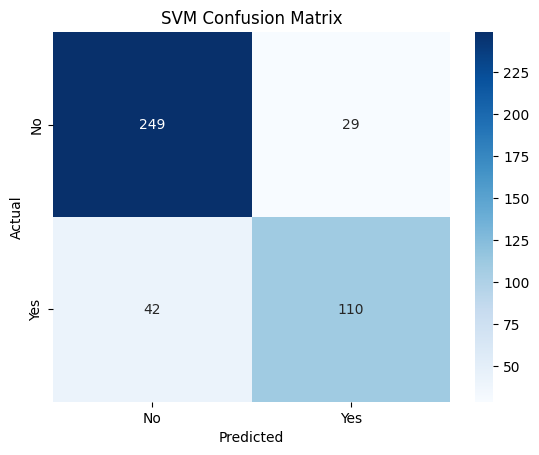

In [31]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


*Classification Report and accuracy*

In [32]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", round(accuracy_svm, 4))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       278
           1       0.79      0.72      0.76       152

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.82       430
weighted avg       0.83      0.83      0.83       430

SVM Accuracy: 0.8349


In [33]:
rf_model, y_pred_rf
cat_model, y_pred_cat
svm_model, y_pred_svm, X_test_svm


(SVC(probability=True, random_state=42),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

# Comparative Analysis of the models

In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


metrics = {
    'Model': ['Random Forest', 'CatBoost', 'SVM (RBF)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_cat),
        accuracy_score(y_test, y_pred_svm)
    ],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_cat),
        precision_score(y_test, y_pred_svm)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_cat),
        recall_score(y_test, y_pred_svm)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_cat),
        f1_score(y_test, y_pred_svm)
    ]
}

comparison_df = pd.DataFrame(metrics)
print("\nModel Comparison Table:\n")
print(comparison_df.round(4))



Model Comparison Table:

           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest    0.9442     0.9444  0.8947    0.9189
1       CatBoost    0.9488     0.9392  0.9145    0.9267
2      SVM (RBF)    0.8349     0.7914  0.7237    0.7560


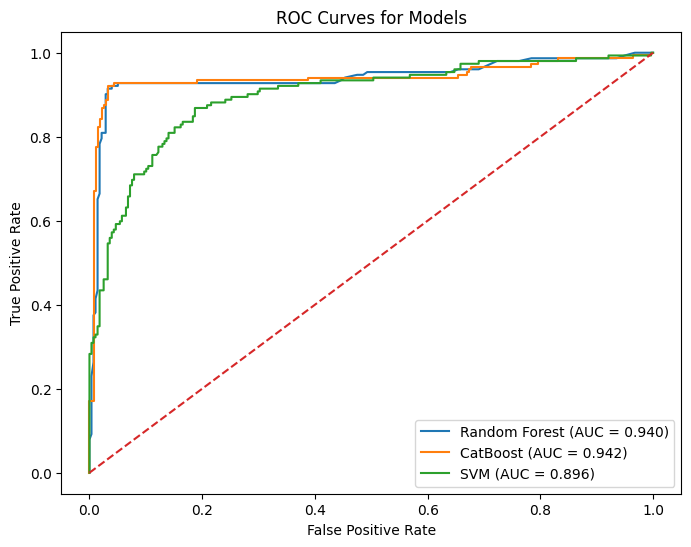

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Class probabilities
rf_probs = rf_model.predict_proba(X_test)[:, 1]
cat_probs = cat_model.predict_proba(X_test)[:, 1]

svm_probs = svm_model.predict_proba(X_test_svm)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
cat_fpr, cat_tpr, _ = roc_curve(y_test, cat_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

auc_rf = roc_auc_score(y_test, rf_probs)
auc_cat = roc_auc_score(y_test, cat_probs)
auc_svm = roc_auc_score(y_test, svm_probs)


plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(cat_fpr, cat_tpr, label=f"CatBoost (AUC = {auc_cat:.3f})")
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {auc_svm:.3f})")

plt.plot([0,1],[0,1],'--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()
